In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import util
from skimage.filters import threshold_otsu
from skimage.segmentation import flood

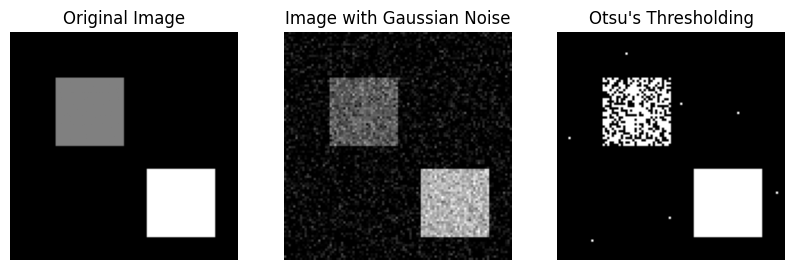

Otsu's Threshold Value: 77


In [6]:
# Generate a synthetic image with 2 objects and a background (3 intensity values)
image = np.zeros((100, 100), dtype=np.uint8)
image[20:50, 20:50] = 85    # Object 1
image[60:90, 60:90] = 170   # Object 2

# Display original image
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Add Gaussian noise
noisy_image = util.random_noise(image, mode='gaussian', var=0.01)
noisy_image = (255*noisy_image).astype(np.uint8)

# Display noisy image
plt.subplot(1, 3, 2)
plt.title("Image with Gaussian Noise")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

# Apply Otsu's thresholding
threshold = threshold_otsu(noisy_image)
binary_otsu = noisy_image > threshold

# Display segmented image
plt.subplot(1, 3, 3)
plt.title("Otsu's Thresholding")
plt.imshow(binary_otsu, cmap='gray')
plt.axis('off')
plt.show()

print(f"Otsu's Threshold Value: {threshold}")


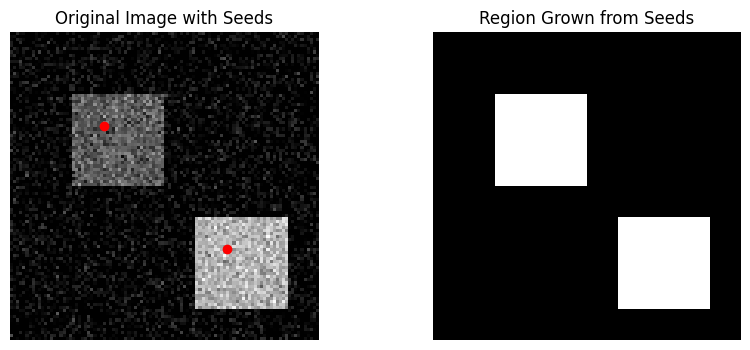

In [12]:
# ---------------------------
# Region Growing (Multiple Seeds)
# ---------------------------

def region_growing_multiple_seeds(img, seeds, threshold=20):
    mask = np.zeros_like(img, dtype=bool)
    for seed in seeds:
        region = flood(img, seed_point=seed, tolerance=threshold)
        mask |= region  
    return mask

# Define multiple seed points manually inside object regions
seed_points = [(30, 30), (70, 70)]  

# Apply region growing
region = region_growing_multiple_seeds(image, seed_points, threshold=20)


# Display region-growing result
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image with Seeds")
plt.imshow(noisy_image, cmap='gray')
for seed in seed_points:
    plt.plot(seed[1], seed[0], 'ro')  
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Region Grown from Seeds")
plt.imshow(region, cmap='gray')
plt.axis('off')
plt.show()
